In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
ins = pd.read_csv('E:\Data Science Dataset\Final project datasets\insurance.csv')

In [3]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ins.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='charges'>

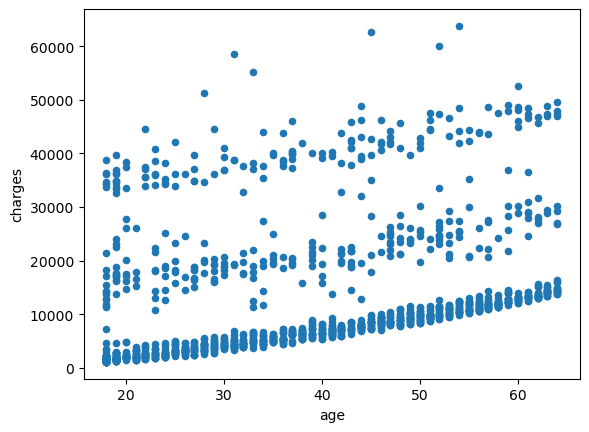

In [5]:
ins.plot(kind = 'scatter', x = 'age', y = 'charges')

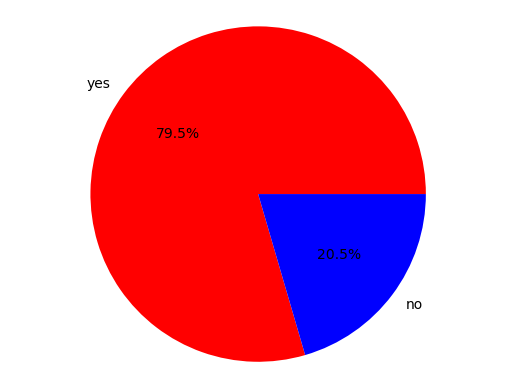

In [6]:
#Interpretation
#Piechart on charges
counts = ins['smoker'].value_counts()
colors = ['red', 'blue', 'green', 'yellow', 'orange']
plt.pie(counts, labels=['yes', 'no'],colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [7]:
ins.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
import seaborn as sns

In [9]:
non_numeric = ins.select_dtypes(include='object')
non_numeric


,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
ins[ins.select_dtypes(include=['object']).columns] = ins[ins.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [12]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [14]:
non_numeric = ins.select_dtypes(include='object')
non_numeric

""
0
1
2
3
4
...
1333
1334
1335
1336


In [15]:
ins.isnull().sum()/ins.shape[0]*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
ins_train, ins_test = train_test_split(ins, test_size=.2)

In [17]:
print(ins_train.shape)
print(ins_test.shape)

(1070, 7)
(268, 7)


In [18]:
ins.iloc[ : , 0:-1]

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [19]:
ins.iloc[:,-1]

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [20]:
ins_train_x = ins_train.iloc[ : , 0:-1]
ins_train_y = ins_train.iloc[ : , -1]

In [21]:
ins_test_x = ins_test.iloc[ : , 0:-1]
ins_test_y = ins_test.iloc[ : , -1]

In [22]:
print(ins_train_x.shape)
print(ins_train_y.shape)
print()
print(ins_test_x.shape)
print(ins_test_y.shape)

(1070, 6)
(1070,)

(268, 6)
(268,)


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
linreg = LinearRegression()

In [25]:
linreg.fit(ins_train_x, ins_train_y)

LinearRegression()

In [26]:
pred_train = linreg.predict(ins_train_x)
pred_test = linreg.predict(ins_test_x)

In [27]:
len(pred_train)

1070

In [28]:
Rsquare = linreg.score(ins_train_x, ins_train_y)
Rsquare

0.7547518813202355

In [29]:
N = ins_train_x.shape[0] #number rown/records
K = ins_train_x.shape[1] #number of independent variables 

In [30]:
Adjsquare = 1 - (1- Rsquare)*(N-1)/(N-K-1)
Adjsquare

0.7533676021931626

In [31]:
linreg.coef_

array([  253.19012615,   -70.81217937,   315.41818065,   668.85293644,
       23927.3064722 ,  -332.93498177])

In [32]:
linreg.intercept_

-11475.098281572875

In [33]:
error_train = ins_train_y - pred_train
error_train

1052   -1650.156285
1163     218.982894
1106   -1049.013224
210    -1616.670015
882     1762.174854
           ...     
114    -2296.260466
15      1143.199829
891    -1565.218408
13     -3506.912973
848     1010.317667
Name: charges, Length: 1070, dtype: float64

In [34]:
error_test = ins_test_y - pred_test
error_test

1148    1960.874648
616      -64.816608
125     -801.758178
375    -8838.166904
873    -1656.374192
           ...     
168     -990.335919
659     -317.064835
111     -275.821549
151    -1519.630596
1165    -398.867353
Name: charges, Length: 268, dtype: float64

In [35]:
import numpy as np

In [36]:
SSE = np.sum(np.square(error_train))
SSE

39004174829.30639

In [37]:
ins_train_y.mean()

13349.061139157957

In [38]:
err_with_mean = ins_train_y.mean()
err_with_mean

13349.061139157957

In [39]:
err_with_mean = ins_train_y.mean() - pred_train
err_with_mean

array([ 2410.87815367, 11367.21318299,  3311.88916535, ...,
        4540.02913113, -1248.56963346, 11385.25280638])

In [40]:
SSR = np.sum(np.sum(np.square(err_with_mean)))
SSR

120035474645.99301

In [41]:
SST = SSE + SSR
SST

159039649475.2994

In [42]:
rsq = SSR / (SSE + SSR)
rsq


0.7547518813202354

In [43]:
# mean pf the error term should always be zero 
np.mean(error_train)

7.003959198699934e-13

(array([ 96.,  68., 446., 258.,  80.,  64.,  19.,  15.,  16.,   8.]),
 array([-11577.74200689,  -7861.44142116,  -4145.14083542,   -428.84024969,
          3287.46033605,   7003.76092178,  10720.06150752,  14436.36209325,
         18152.66267899,  21868.96326472,  25585.26385046]),
 <BarContainer object of 10 artists>)

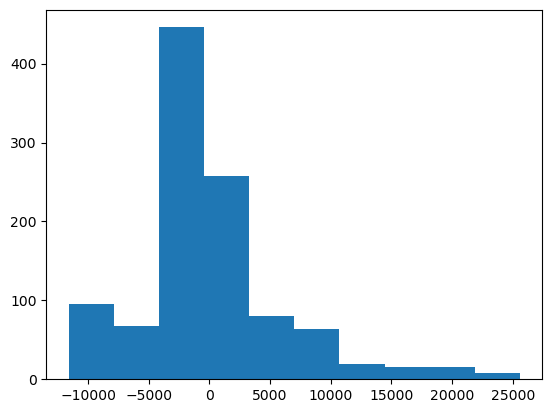

In [44]:
plt.hist(error_train)

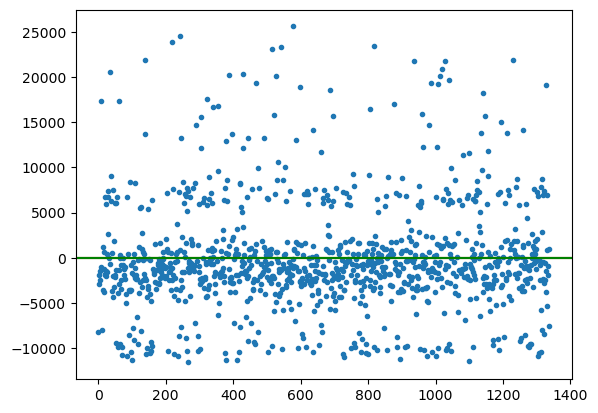

In [45]:
plt.plot(error_train, '.')
plt.axhline(y= np.mean(error_train), color = 'r')
plt.axhline(y=2, color = 'g')
plt.axhline(y=-2, color = 'g')

In [46]:
actual_pred = pd.DataFrame({'Pred': pred_train, 'Actual' : ins_train_y})
actual_pred

,Pred,Actual
1052,10938.182985,9288.02670
1163,1981.847956,2200.83085
1106,10037.171974,8988.15875
210,3596.740015,1980.07000
882,823.675796,2585.85065
...,...,...
114,13784.577416,11488.31695
15,694.037171,1837.23700
891,8809.032008,7243.81360
13,14597.630773,11090.71780


In [47]:
import seaborn as sns

<AxesSubplot:xlabel='Actual', ylabel='Pred'>

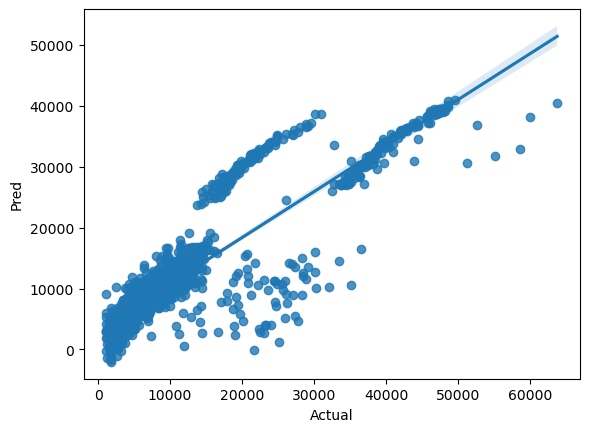

In [48]:
sns.regplot(x = 'Actual', y = 'Pred', data = actual_pred)

In [49]:
pred_test = linreg.predict(ins_test_x)
error_test = ins_test_y - pred_test

In [50]:
MAE = np.mean(np.abs(error_test))
MAE

4094.679739903754

In [51]:
MSE = np.mean(np.square(error_test))
MSE

37188029.08580164

In [52]:
RMSE = np.sqrt(MSE)
RMSE

6098.198839477247

In [53]:
MAPE = np.mean(np.abs(error_test*100/ins_test_y))
MAPE

39.56931844586844

In [55]:
acc = np.round(100 - MAPE)
acc

60.0

In [60]:
#knn can't be apply here because variables are continuous.

In [1]:
#same case with random forest.